In [5]:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
#IMPORTS
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


## Cleaning and visualizing data 

In [7]:
sp500=yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500
#each row is the price in a single trading day
#open : opening price, high: highest price during the day low: lowest price during the day, close: closing price
#volume: total volume that was traded that day

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,3976.820068,3983.090088,3954.340088,3958.790039,4165320000,0,0
2022-11-17 00:00:00-05:00,3919.260010,3954.330078,3906.540039,3946.560059,4051780000,0,0
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,0,0


<AxesSubplot:xlabel='Date'>

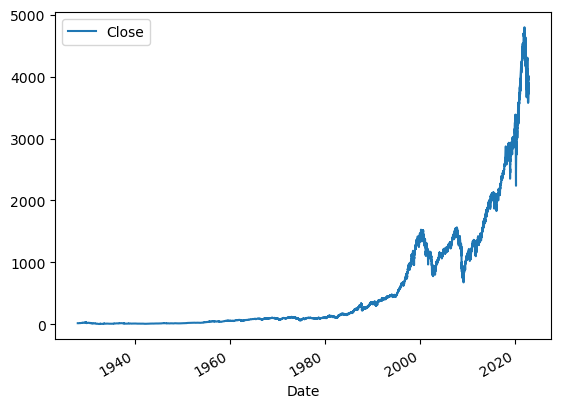

In [8]:
sp500.plot.line(y="Close",use_index=True)

In [9]:
del sp500["Dividends"]
del sp500["Stock Splits"]

## Setting up target

In [10]:
#Tomorrow's price is the closing price of the day after. 
sp500["Tomorrow"] = sp500["Close"].shift(-1) 
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,3976.820068,3983.090088,3954.340088,3958.790039,4165320000,3946.560059
2022-11-17 00:00:00-05:00,3919.260010,3954.330078,3906.540039,3946.560059,4051780000,3965.340088
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,3949.939941


In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,3976.820068,3983.090088,3954.340088,3958.790039,4165320000,3946.560059,0
2022-11-17 00:00:00-05:00,3919.260010,3954.330078,3906.540039,3946.560059,4051780000,3965.340088,1
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,3949.939941,0


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-11-16 00:00:00-05:00,3976.820068,3983.090088,3954.340088,3958.790039,4165320000,3946.560059,0
2022-11-17 00:00:00-05:00,3919.260010,3954.330078,3906.540039,3946.560059,4051780000,3965.340088,1
2022-11-18 00:00:00-05:00,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,3949.939941,0


## Training the model

In [13]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=200,min_samples_split=40,random_state=1)
train = sp500.iloc[:-3000]
test = sp500.iloc[-3000:]
predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors] , train["Target"])

RandomForestClassifier(min_samples_split=40, n_estimators=200, random_state=1)

In [14]:
#Measure how accurate the model is
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds,index=test.index)
print(preds)
precision_score(test["Target"],preds)

Date
2010-12-23 00:00:00-05:00    0
2010-12-27 00:00:00-05:00    1
2010-12-28 00:00:00-05:00    1
2010-12-29 00:00:00-05:00    1
2010-12-30 00:00:00-05:00    1
                            ..
2022-11-16 00:00:00-05:00    0
2022-11-17 00:00:00-05:00    0
2022-11-18 00:00:00-05:00    0
2022-11-21 00:00:00-05:00    0
2022-11-22 00:00:00-05:00    0
Length: 3000, dtype: int64


0.5361596009975063

<AxesSubplot:xlabel='Date'>

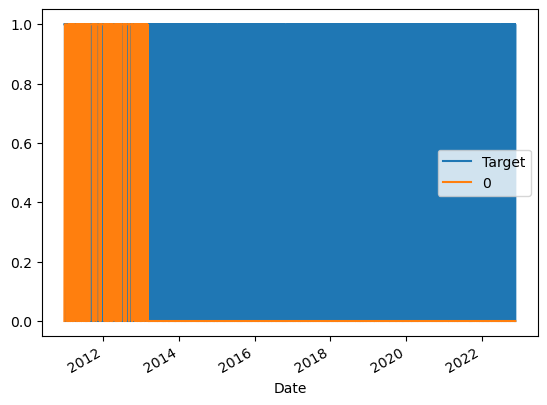

In [25]:
# Comparing our predictions with the actual target
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [28]:
#Back testing
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [29]:
# take 10 years of data predict 11th year, take 11 years of data predict 12th year ... 
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [30]:
predictions = backtest(sp500,model,predictors)
predictions["Predictions"].value_counts()
precision_score(predictions["Target"],predictions["Predictions"])

0.5299872394725649

In [34]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.534807
0    0.465193
Name: Target, dtype: float64

In [35]:
# Adding some predictors to the model (it may improves accurecy)
horizons = [2,5,60,250,1000]
new_predictors =[]
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column=f"Close_Ratio_{horizon}"
    sp500[ratio_column]=sp500["Close"]/rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors+=[ratio_column,trend_column]


In [46]:
sp500=sp500.dropna()

In [43]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [54]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6]=1 
    preds[preds < .6]=0 
    
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [55]:
predictions = backtest(sp500,model,new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    4772
1.0      16
Name: Predictions, dtype: int64

In [53]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5625